<center><img src="../../logo.png" alt="Header" style="width: 800px;"/></center>

@Copyright (C): 2010-2022, Shenzhen Yahboom Tech  
@Author: Liusen  
@Date: 2020-02-20 09:35:00  
@LastEditors: Liusen  
@LastEditTime: 2020-02-22 14:43:00 

# Add damage to the original image

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-82xwsfvt because the default path (/home/jetson/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


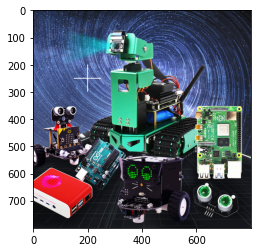

In [1]:
#Add damage to the original image
import cv2 
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('yahboom.jpg',1)
for i in range(200,300):
    img[i,200] = (255,255,255)
    img[i,200+1] = (255,255,255)
    img[i,200-1] = (255,255,255)
for i in range(150,250):
    img[250,i] = (255,255,255)
    img[250+1,i] = (255,255,255)
    img[250-1,i] = (255,255,255)
cv2.imwrite('damaged.jpg',img)
# cv2.imshow('image',img)
# cv2.waitKey(0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Repair broken pictures

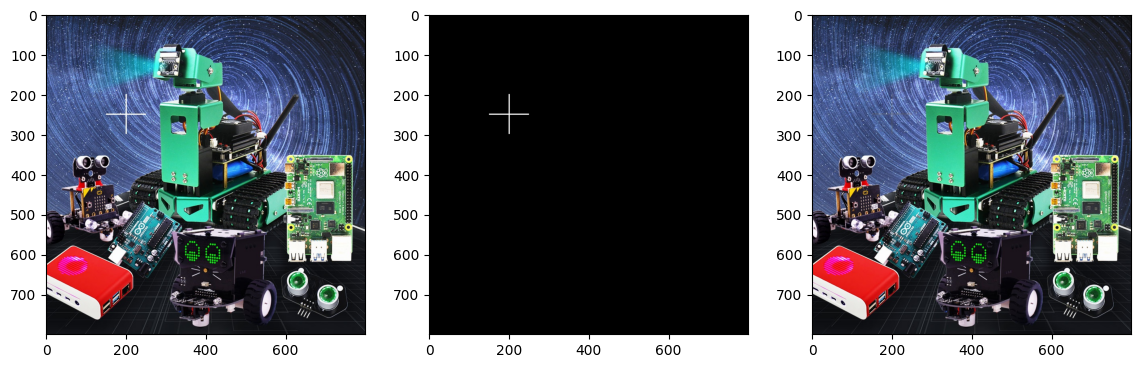

In [2]:
#1 damaged image 2 mask 3 inpaint
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('damaged.jpg',1)
#cv2.imshow('src',img)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
paint = np.zeros((height,width,1),np.uint8)

for i in range(200,300):
    paint[i,200] = 255
    paint[i,200+1] = 255
    paint[i,200-1] = 255
for i in range(150,250):
    paint[250,i] = 255
    paint[250+1,i] = 255
    paint[250-1,i] = 255
#cv2.imshow('paint',paint)
#1 src 2 mask
imgDst = cv2.inpaint(img,paint,3,cv2.INPAINT_TELEA)

# cv2.imshow('image',imgDst)
# cv2.waitKey(0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
paint = cv2.cvtColor(paint, cv2.COLOR_BGR2RGB)
imgDst = cv2.cvtColor(imgDst, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(14, 9), dpi=100)#Set the size and pixels of the drawing area
plt.subplot(131)  #The first in a row and three columns
plt.imshow(img)
plt.subplot(132)  #The second in a row and three columns
plt.imshow(paint)
plt.subplot(133)  #The third in a row and three columns
plt.imshow(imgDst)

plt.show()